# Portfolio Optimization

In [1]:
import pandas as pd
from datetime import datetime, timedelta
from pyfinlab import data_api as api
from pyfinlab import risk_models as risk
from pyfinlab import return_models as ret
from pyfinlab import portopt as opt
from pyfinlab import performance as perf
from pyfinlab import report_generation as report
%matplotlib inline

## Introduction

Navigate to the data folder and open the 'portopt_inputs.xlsx' Excel file. The 'mapping' tab contains columns for the tickers, their names, multiple categories by which to classify each ticker, and ending with a MIN and MAX column where you set your ticker-level weighting constraints. The 'mapping' tab is used to map each category to each ticker allowing you to easily constrain both at the ticker-level and category-level. The other tabs contain the constraints for each of the categories contained in the 'mapping' tab as columns. They are region, size, style, credit, duration, asset_class, sec_type, holding, and sector. 

##### Category Definitions

* 'SIZE': Market cap size of common stocks and underlying holdings in equity ETFs.
    * example: large cap, mid cap, small cap
* 'SECTOR': Equity sector of common stocks and underlying holdings in equity ETFs.
    * example: technology, consumer staples, healthcare
* 'STYLE': Investment style of common stocks and underlying holdings in equity ETFs.
    * example: value, blend, growth
* 'REGION': Geographic region of all portfolio holdings.
    * example: U.S., Developed Markets, Emerging Markets
* 'HOLDING': Core versus satellite specification for common stocks and underlying holdings in equity ETFs.
    * example: core, satellite...helpful when managing a core/satellite strategy
* 'ASSET_CLASS': Asset class of all portfolio holdings.
    * example: equity, bond
* 'SECURITY_TYPE': Security type of all portfolio holdings.
    * example: common stocks, ETFs
* 'DURATION': Duration for bond ETF underlying holdings.
    * example: long, intermediate, short
* 'CREDIT': Credit quality of bond ETF underlying holdings.
    * example: high, mid, low

Enter inputs. How many years of price data do you want to use to optimize portfolios? Choose an API source, either 'yfinance' which is free, or, 'bloomberg' which requires a Bloomberg Professional Service subscription. Choose from the available risk and return models which you can find in the docstrings. Finally, enter a benchmark ticker by which to compare the optimized portfolios to. 

In [2]:
num_years = 10 # how many years of price data do you want to use?
api_source = 'yfinance'
risk_model = 'oracle_approximating'
return_model = 'capm_return'
benchmark_ticker = 'ACWI'

Assign ticker list. 

In [3]:
tickers = opt.tickers

Choose start and end dates. 

In [4]:
# start_date = (datetime.today() - timedelta(days=365*num_years))
# end_date = (datetime.today() - timedelta(days=0))
# start_date.strftime('%Y-%m-%d') if api_source=='yfinance' else start_date.strftime('%m-%d-%Y')
# end_date.strftime('%Y-%m-%d') if api_source=='yfinance' else end_date.strftime('%m-%d-%Y')

start_date, end_date = api.start_end_dates(num_years, api_source)
print('Start Date: {}'.format(start_date))
print('End Date: {}'.format(end_date))

Start Date: 2011-08-12
End Date: 2021-08-09


Download price data and risk-free rate. 

In [5]:
prices = api.price_history(tickers, start_date, end_date, api_source)
risk_free_rate = api.risk_free_rate(start_date, end_date, api_source=api_source)

[*********************100%***********************]  16 of 16 completed
[*********************100%***********************]  1 of 1 completed


Compute covariance matrix and expected return vector. 

In [6]:
cov_matrix = risk.risk_model(prices, risk_model)
exp_returns = ret.return_model(prices, return_model, risk_free_rate)

## Optimize a single portfolio given 10% target portfolio risk and display. 

In [7]:
target_volatility = 0.1 # choose target volatility and run
objective_function = 'efficient_risk'
optimized_portfolio, optimized_performance = opt.optimize_portfolio(
    exp_returns, cov_matrix,
    risk_model, return_model,
    objective_function,
    target_volatility
)
opt.display_portfolio(optimized_portfolio, optimized_performance)

                      PORTFOLIO
capm_return              0.0974
oracle_approximating     0.1000
sharpe_ratio             0.7736


,NAME,DURATION,CREDIT,SECURITY_TYPE,SECTOR,SIZE,STYLE,REGION,HOLDING,ASSET_CLASS,WEIGHTING
TICKER,,,,,,,,,,,
SHY,iShares 1-3 Year Treasury Bond ETF,Short Duration,High-Grade Bond,ETF,Bond,Bond,Bond,U.S.,Satellite,Bond,0.1358
IWR,iShares Russell Mid-Cap ETF,Equity,Equity,ETF,Multi-Sector,Mid-Cap,Blend,U.S.,Core,Equity,0.0900
IWD,iShares Russell 1000 Value ETF,Equity,Equity,ETF,Multi-Sector,Large-Cap,Value,U.S.,Satellite,Equity,0.0897
AGG,iShares Core U.S. Aggregate Bond ETF,Intermediate Duration,Mid-Grade Bond,ETF,Bond,Bond,Bond,U.S.,Core,Bond,0.0882
IWB,iShares Russell 1000 ETF,Equity,Equity,ETF,Multi-Sector,Large-Cap,Blend,U.S.,Core,Equity,0.0765
HYG,iShares iBoxx High Yield Corporate Bond ETF,Intermediate Duration,Low-Grade Bond,ETF,Bond,Bond,Bond,U.S.,Core,Bond,0.0602
IWS,iShares Russell Mid-Cap Value ETF,Equity,Equity,ETF,Multi-Sector,Mid-Cap,Value,U.S.,Satellite,Equity,0.0596
IEFA,iShares Core MSCI EAFE ETF,Equity,Equity,ETF,Multi-Sector,Large-Cap,Blend,Developed Markets,Core,Equity,0.0572
GOVT,iShares US Treasury Bond ETF,Intermediate Duration,High-Grade Bond,ETF,Bond,Bond,Bond,U.S.,Core,Bond,0.0546


In [8]:
optimized_portfolio

,NAME,DURATION,CREDIT,SECURITY_TYPE,SECTOR,SIZE,STYLE,REGION,HOLDING,ASSET_CLASS,WEIGHTING
TICKER,,,,,,,,,,,
AGG,iShares Core U.S. Aggregate Bond ETF,Intermediate Duration,Mid-Grade Bond,ETF,Bond,Bond,Bond,U.S.,Core,Bond,0.0882
GOVT,iShares US Treasury Bond ETF,Intermediate Duration,High-Grade Bond,ETF,Bond,Bond,Bond,U.S.,Core,Bond,0.0546
HYG,iShares iBoxx High Yield Corporate Bond ETF,Intermediate Duration,Low-Grade Bond,ETF,Bond,Bond,Bond,U.S.,Core,Bond,0.0602
IEFA,iShares Core MSCI EAFE ETF,Equity,Equity,ETF,Multi-Sector,Large-Cap,Blend,Developed Markets,Core,Equity,0.0572
IWB,iShares Russell 1000 ETF,Equity,Equity,ETF,Multi-Sector,Large-Cap,Blend,U.S.,Core,Equity,0.0765
IWD,iShares Russell 1000 Value ETF,Equity,Equity,ETF,Multi-Sector,Large-Cap,Value,U.S.,Satellite,Equity,0.0897
IWF,iShares Russell 1000 Growth ETF,Equity,Equity,ETF,Multi-Sector,Large-Cap,Growth,U.S.,Satellite,Equity,0.0435
IWM,iShares Russell 2000 ETF,Equity,Equity,ETF,Multi-Sector,Small-Cap,Blend,U.S.,Core,Equity,0.0280
IWN,iShares Russell 2000 Value ETF,Equity,Equity,ETF,Multi-Sector,Small-Cap,Value,U.S.,Satellite,Equity,0.0210


Available categories for grouping cash and risk allocations. 

In [9]:
groups = list(opt.classification.columns[1:])
print('Available Groups: {}'.format(groups))

Available Groups: ['DURATION', 'CREDIT', 'SECURITY_TYPE', 'SECTOR', 'SIZE', 'STYLE', 'REGION', 'HOLDING', 'ASSET_CLASS']


Print cash and risk allocation by weighting. 

In [10]:
group = 'ASSET_CLASS' # Select a category to view portfolio exposure. 

In [11]:
print(opt.cash_focus(optimized_portfolio).get(group).rename(columns={'WEIGHTING': 'CASH_WTG'}))
print(' ')
print(opt.risk_focus(optimized_portfolio, cov_matrix).get(group).rename(columns={'WEIGHTING': 'RISK_WTG'}))

        CASH_WTG
Bond      0.4330
Equity    0.5669
 
        RISK_WTG
Bond      0.0312
Equity    0.9685


## Compute Efficient Frontier Portfolios

In [12]:
optimized_portfolios, results = opt.compute_efficient_frontier(
    exp_returns, cov_matrix, risk_model, return_model
)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 14.27it/s]


Show efficient frontier portfolios cash weightings. 

In [13]:
optimized_portfolios.iloc[:, 10:]

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
TICKER,,,,,,,,,,,,,,,,,,,,
AGG,0.0000,0.0133,0.0362,0.0572,0.0742,0.0713,0.0706,0.0725,0.0747,0.0817,0.0888,0.0957,0.1005,0.0446,0.0000,0.0000,0.0000,0.0000,0.0000,0.00
GOVT,0.3464,0.2672,0.2028,0.1434,0.0910,0.0787,0.0691,0.0660,0.0628,0.0586,0.0543,0.0500,0.0357,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.00
HYG,0.0911,0.0799,0.0680,0.0570,0.0471,0.0456,0.0472,0.0488,0.0506,0.0556,0.0606,0.0656,0.0701,0.0675,0.0380,0.0000,0.0000,0.0000,0.0000,0.00
IEFA,0.0000,0.0098,0.0148,0.0194,0.0242,0.0295,0.0350,0.0403,0.0457,0.0517,0.0578,0.0638,0.0701,0.0799,0.0901,0.0993,0.1057,0.1071,0.1066,0.00
IWB,0.0483,0.0826,0.0903,0.0966,0.1010,0.0964,0.0914,0.0829,0.0748,0.0757,0.0765,0.0774,0.0822,0.1345,0.1901,0.2440,0.2947,0.2998,0.2935,0.35
IWD,0.0000,0.0000,0.0000,0.0000,0.0000,0.0158,0.0229,0.0262,0.0311,0.0616,0.0924,0.1227,0.1511,0.1557,0.1598,0.1605,0.1521,0.1630,0.1766,0.00
IWF,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0142,0.0241,0.0342,0.0444,0.0545,0.0628,0.0493,0.0422,0.0443,0.0488,0.0742,0.1046,0.35
IWM,0.0139,0.0472,0.0621,0.0754,0.0882,0.0944,0.0797,0.0698,0.0594,0.0431,0.0266,0.0103,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.00
IWN,0.0000,0.0000,0.0000,0.0000,0.0000,0.0056,0.0125,0.0151,0.0177,0.0194,0.0211,0.0228,0.0215,0.0145,0.0000,0.0000,0.0000,0.0000,0.0000,0.00


Compute risk weightings. 

In [14]:
risk_weightings = opt.risk_weightings(optimized_portfolios, cov_matrix)

Show the risk and return model inputs for the optimizer for each efficient frontier portfolio and the expected sharpe ratio. 

In [15]:
results

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
efficient_frontier,,,,,,,,,,,,,,,,,,,,
capm_return,0.0298,0.0402,0.0475,0.0542,0.0606,0.0669,0.0731,0.0793,0.0856,0.0917,0.0979,0.1040,0.1102,0.1163,0.1223,0.1283,0.1341,0.1399,0.1455,0.1498
oracle_approximating,0.0201,0.0282,0.0362,0.0443,0.0523,0.0604,0.0684,0.0765,0.0846,0.0926,0.1007,0.1087,0.1168,0.1249,0.1329,0.1410,0.1490,0.1571,0.1651,0.1732
sharpe_ratio,0.4857,0.7180,0.7599,0.7722,0.7754,0.7759,0.7757,0.7754,0.7749,0.7743,0.7735,0.7728,0.7720,0.7712,0.7701,0.7684,0.7661,0.7632,0.7600,0.7493


Show the cash and risk weightings grouped by asset class. 

In [16]:
print('Available Groups: {}'.format(groups))

Available Groups: ['DURATION', 'CREDIT', 'SECURITY_TYPE', 'SECTOR', 'SIZE', 'STYLE', 'REGION', 'HOLDING', 'ASSET_CLASS']


In [17]:
group = 'ASSET_CLASS'
opt.cash_focus(optimized_portfolios).get(group)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Bond,0.9375,0.8604,0.807,0.7576,0.7086,0.665,0.6181,0.5713,0.5245,0.4770,0.429,0.3816,0.3337,0.2806,0.2178,0.1520,0.0986,0.0560,0.0187,0.0
Equity,0.0622,0.1396,0.193,0.2423,0.2851,0.335,0.3773,0.4287,0.4757,0.5232,0.571,0.6184,0.6662,0.7194,0.7781,0.8481,0.9013,0.9441,0.9812,1.0


In [18]:
opt.risk_focus(optimized_portfolios, cov_matrix).get(group)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Bond,0.746,0.2704,0.1311,0.0726,0.0462,0.0397,0.0354,0.0316,0.0293,0.0303,0.0314,0.0325,0.0333,0.0268,0.0066,-0.0154,-0.022,-0.0163,-0.0056,0.0
Equity,0.254,0.7297,0.8689,0.9273,0.9538,0.9604,0.9647,0.9685,0.9708,0.9696,0.9685,0.9675,0.9669,0.9733,0.9934,1.0154,1.022,1.0162,1.0057,1.0


Compute cash and risk weightings grouped by category for all efficient frontier portfolios. 

In [19]:
cash_focus = opt.compile_focus_stats(optimized_portfolios, cov_matrix, focus='cash')
risk_focus = opt.compile_focus_stats(optimized_portfolios, cov_matrix, focus='risk')

Display cash weightings grouped by category for all efficient portfolios. 

In [20]:
cash_focus

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Cash Weighting,,,,,,,,,,,,,,,,,,,,
Equity,0.0622,0.1396,0.1930,0.2423,0.2851,0.3350,0.3773,0.4287,0.4757,0.5232,0.5710,0.6184,0.6662,0.7194,0.7781,0.8481,0.9013,0.9441,0.9812,1.00
Intermediate Duration,0.4375,0.3604,0.3070,0.2576,0.2123,0.2116,0.2093,0.2155,0.2221,0.2358,0.2495,0.2630,0.2647,0.1891,0.1209,0.0621,0.0140,0.0000,0.0000,0.00
Long Duration,0.0000,0.0000,0.0000,0.0000,0.0000,0.0063,0.0166,0.0246,0.0326,0.0411,0.0497,0.0581,0.0690,0.0915,0.0969,0.0899,0.0846,0.0560,0.0187,0.00
Short Duration,0.5000,0.5000,0.5000,0.5000,0.4963,0.4471,0.3922,0.3312,0.2698,0.2001,0.1298,0.0605,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.00
High-Grade Bond,0.8464,0.7672,0.7028,0.6434,0.5873,0.5321,0.4779,0.4218,0.3652,0.2998,0.2338,0.1686,0.1047,0.0915,0.0969,0.0899,0.0846,0.0560,0.0187,0.00
Low-Grade Bond,0.0911,0.0799,0.0680,0.0570,0.0471,0.0456,0.0472,0.0488,0.0506,0.0556,0.0606,0.0656,0.0701,0.0675,0.0380,0.0000,0.0000,0.0000,0.0000,0.00
Mid-Grade Bond,0.0000,0.0133,0.0362,0.0572,0.0742,0.0873,0.0930,0.1007,0.1087,0.1216,0.1346,0.1474,0.1589,0.1216,0.0829,0.0621,0.0140,0.0000,0.0000,0.00
ETF,0.9997,1.0000,1.0000,0.9999,0.9937,1.0000,0.9954,1.0000,1.0002,1.0002,1.0000,1.0000,0.9999,1.0000,0.9959,1.0001,0.9999,1.0001,0.9999,1.00
Bond,0.9375,0.8604,0.8070,0.7576,0.7086,0.6650,0.6181,0.5713,0.5245,0.4770,0.4290,0.3816,0.3337,0.2806,0.2178,0.1520,0.0986,0.0560,0.0187,0.00


Plot efficient frontier with individual assets and save image to charts folder. 

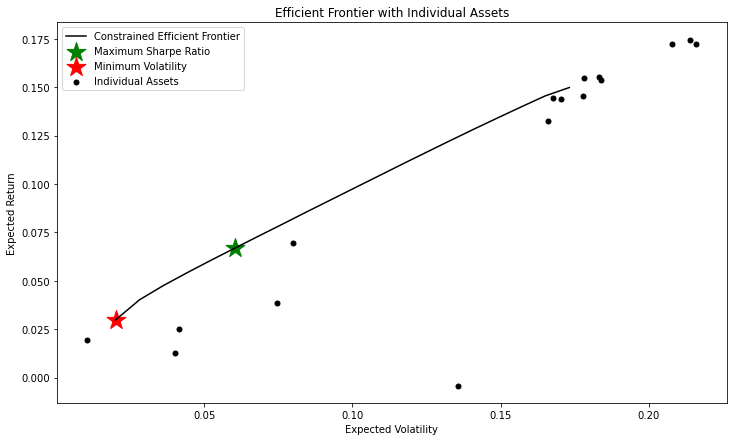

In [21]:
opt.eff_frontier_plot(tickers, cov_matrix, exp_returns, results, figsize=(12, 7), save=False, show=True)

Plot monte carlo efficient frontier with random portfolios and save image to charts folder. 

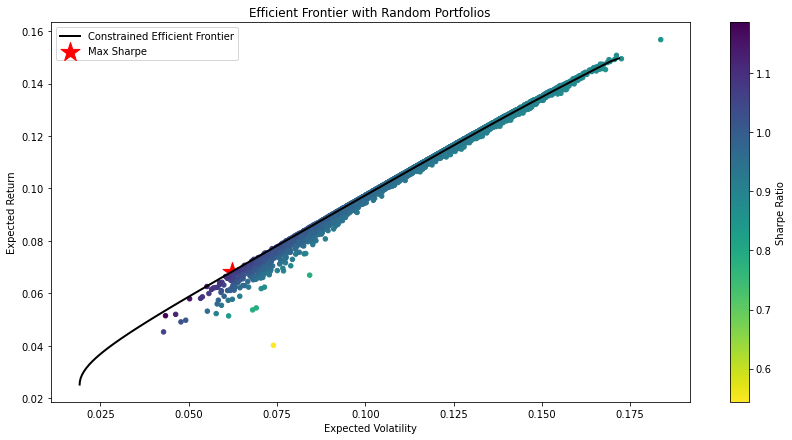

In [22]:
opt.monte_carlo_frontier(
    cov_matrix, exp_returns, figsize=(12, 6), save=False, show=True)

# Backtest Efficient Frontier Portfolios

In [23]:
backtest_timeseries = opt.backtest_timeseries(prices, optimized_portfolios, api_source, benchmark_ticker)

[*********************100%***********************]  1 of 1 completed


Plot all portfolios. 

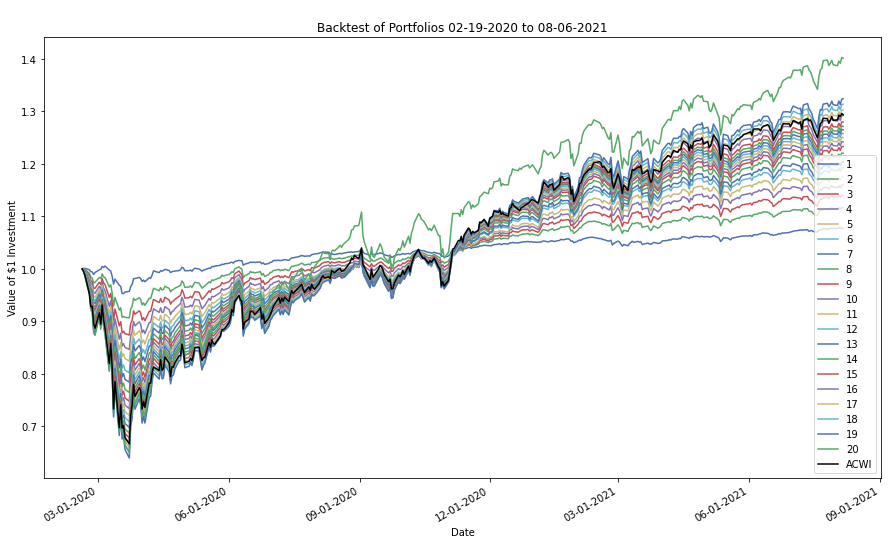

In [28]:
opt.backtest_linechart(
    backtest_timeseries, '02-19-2020', end_date,  
    api_source, chart=1, figsize=(15, 9), save=True, show=True, yscale='linear') # figsize=

Plot only five pre-selected portfolios. 

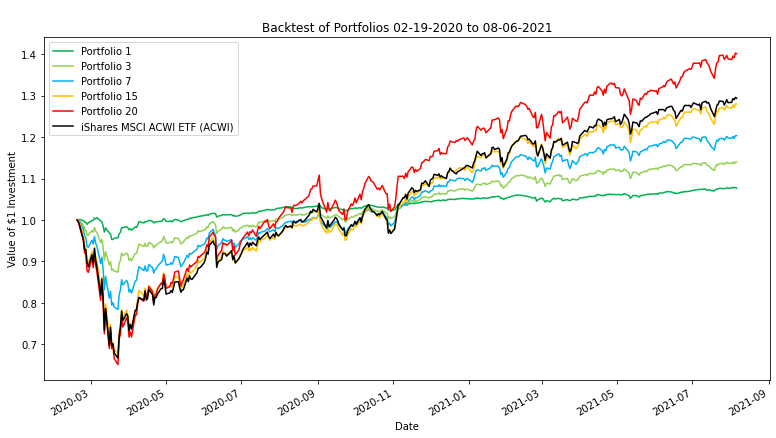

In [29]:
custom_start_date = '02-19-2020'
portfolios = [1, 3, 7, 15, 20] # must enter five portfolios by number (enter 1-20)
opt.backtest_linechart(
    backtest_timeseries, custom_start_date, end_date, portfolios, 
    api_source, chart=2, figsize=(13, 7), save=False, show=True, yscale='linear')

# Compute Performance Statistics

In [30]:
backtest_statistics = perf.compile_performance_stats(
    backtest_timeseries, risk_model, benchmark_ticker, risk_free_rate)

These are the time periods that were backtested. 

In [31]:
backtested_periods = perf.backtested_periods(backtest_statistics)
print('Periods Backtested: {}'.format(list(backtested_periods.keys())))

Periods Backtested: ['1WK', '1MO', '3MO', '6MO', '1YR', '3YR', '5YR']


Look up any time period's performance statistics. 

In [32]:
time_period = '1YR' # choose from the list of time periods above. 
backtest_statistics[backtested_periods.get(time_period)]

,vol,beta,cagr,drawdown,capm,jensen_alpha,m2,m2_alpha,sharpe,treynor,sortino,info_ratio,capture_ratio,appraisal_ratio,ulcer
08-07-2020 - 08-06-2021,,,,,,,,,,,,,,,
1,0.0293,0.1752,0.0434,-0.0021,0.0723,-0.0290,0.1308,-0.1859,0.7830,0.2476,1.9316,-0.1303,0.8708,-1.8369,0.2532
2,0.0496,0.3263,0.0938,-0.0007,0.1170,-0.0232,0.2291,-0.0877,1.4803,0.2875,2.5832,-0.1267,0.9506,-1.2475,0.5835
3,0.0625,0.4124,0.1258,-0.0002,0.1425,-0.0168,0.2582,-0.0586,1.6874,0.3049,2.8106,-0.1210,0.9572,-0.7312,0.7030
4,0.0735,0.4840,0.1531,0.0000,0.1637,-0.0106,0.2751,-0.0416,1.8080,0.3163,2.9742,-0.1137,0.9620,-0.3886,0.7665
5,0.0825,0.5413,0.1754,0.0000,0.1807,-0.0053,0.2856,-0.0312,1.8826,0.3240,3.0658,-0.1056,0.9712,-0.1693,0.8060
6,0.0913,0.5994,0.1948,0.0000,0.1979,-0.0031,0.2898,-0.0269,1.9135,0.3249,3.0581,-0.0982,0.9628,-0.0894,0.7999
7,0.0973,0.6387,0.2092,0.0000,0.2095,-0.0003,0.2943,-0.0224,1.9461,0.3276,3.0777,-0.0909,0.9645,-0.0073,0.8086
8,0.1045,0.6906,0.2268,-0.0002,0.2249,0.0019,0.2990,-0.0178,1.9794,0.3284,3.0721,-0.0821,0.9681,0.0507,0.8032
9,0.1105,0.7317,0.2411,-0.0004,0.2370,0.0041,0.3023,-0.0144,2.0035,0.3296,3.0746,-0.0727,0.9679,0.1032,0.8015


# Historical Periodic Performance Statistics

In [33]:
periodic_stats = perf.compile_periodic_stats(backtest_timeseries, backtest_statistics, backtested_periods)

In [34]:
print('Available Stats: {}'.format(perf.available_keys(backtest_statistics, backtested_periods)))

Available Stats: ['vol', 'beta', 'cagr', 'drawdown', 'capm', 'jensen_alpha', 'm2', 'm2_alpha', 'sharpe', 'treynor', 'sortino', 'info_ratio', 'capture_ratio', 'appraisal_ratio', 'ulcer']


Lookup any available periodic statistic by key. 

In [35]:
key = 'cagr'
periodic_stats[key]

,1WK,1MO,3MO,6MO,1YR,3YR,5YR
cagr,,,,,,,
1,-0.0007,0.0021,0.0156,0.0160,0.0434,0.0564,0.0403
2,0.0018,0.0022,0.0196,0.0245,0.0938,0.0699,0.0563
3,0.0030,0.0023,0.0214,0.0305,0.1258,0.0778,0.0656
4,0.0040,0.0025,0.0229,0.0356,0.1531,0.0844,0.0735
5,0.0048,0.0025,0.0239,0.0392,0.1754,0.0894,0.0797
6,0.0052,0.0028,0.0287,0.0418,0.1948,0.0973,0.0878
7,0.0054,0.0033,0.0311,0.0457,0.2092,0.1025,0.0931
8,0.0057,0.0040,0.0354,0.0511,0.2268,0.1105,0.1008
9,0.0060,0.0045,0.0384,0.0552,0.2411,0.1165,0.1068


# Excel Report Generation

Generate and save backtest and efficient frontier plots as png files. 

In [36]:
opt.backtest_linechart(
    backtest_timeseries, custom_start_date, end_date, portfolios,
    api_source, figsize=(14, 7), save=True, show=False, chart=2, yscale='linear')
opt.eff_frontier_plot(
    tickers, cov_matrix, exp_returns, results, figsize=(13, 8), save=True, show=False)
opt.monte_carlo_frontier(
    cov_matrix, exp_returns, figsize=(12, 7), save=True, show=False)

General fully formatted Excel file. 

In [37]:
report.generate_excel_report(
    optimized_portfolios, risk_weightings, results, backtest_timeseries, cash_focus, risk_focus, periodic_stats)